# HR Employee Attrition

###### Find out the leading drivers of Employee Attrition. Track and analyze employee satisfaction and Retain valuable employees. Watson Analytics could be used to Explore deeper into the data for interesting insights and also to create Dashboards.

In [105]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# 1 Get the Data

In [106]:
df = pd.read_csv('10 WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [107]:
def fucn_DB (x):
    if x=="Research & Development": return "R&D"
    else: return "Others"
df['Department_bin'] = df['Department'].apply(fucn_DB)

In [108]:
def func_EB (x):
    if x==1: return "One"
    else: return "Others"
df['EnvironmentSatisfaction_bin'] = df['EnvironmentSatisfaction'].apply(func_EB)

In [109]:
def func_JLB (x):
    if (x==1 or x==3): return "1 or 3"
    else: return "Others"
df['JobLevel_bin'] = df['JobLevel'].apply(func_JLB)

In [110]:
def func_JSB (x):
    if x==1: return "a. 1"
    elif x==4: return "c. 4"
    else: return "b. Others"
df['JobSatisfaction_bin'] = df['JobSatisfaction'].apply(func_JSB)

In [111]:
def func_RSB (x):
    if x==1: return "One"
    else: return "Others"
df['RelationshipSatisfaction_bin'] = df['RelationshipSatisfaction'].apply(func_RSB)

In [112]:
def func_SOB (x):
    if (x==0 or x==3): return "0 or 3"
    else: return "Others"
df['StockOptionLevel_bin'] = df['StockOptionLevel'].apply(func_SOB)

In [113]:
def func_WLB (x):
    if x==1: return "One"
    else: return "Others"
df['WorkLifeBalance_bin'] = df['WorkLifeBalance'].apply(func_WLB)

In [114]:
def func_DFHB (x):
    if x<=7: return "a. less than 7"
    else: return "c. more than 7"
df['DistanceFromHome_bin'] = df['DistanceFromHome'].apply(func_DFHB)

In [115]:
def func_MIB (x):
    if x<3000: return "a. 3000"
    elif x<5000: return "b. 5000"
    else: return "c. more"
df['MonthlyIncome_bin'] = df['MonthlyIncome'].apply(func_MIB)

In [116]:
def BTB (x):
    if x=="Travel_Frequently": return "Travel_Frequently"
    else: return "Others"
df['BusinessTravel_bin'] = df['BusinessTravel'].apply(BTB)

In [117]:
df = df[['Attrition','Department_bin','EnvironmentSatisfaction_bin','JobInvolvement','JobLevel_bin','JobSatisfaction_bin',
         'OverTime','RelationshipSatisfaction_bin','StockOptionLevel_bin','WorkLifeBalance_bin','DistanceFromHome_bin',
         'MonthlyIncome_bin','BusinessTravel_bin']].copy()
df['x'] = df.index
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 14 columns):
Attrition                       1470 non-null object
Department_bin                  1470 non-null object
EnvironmentSatisfaction_bin     1470 non-null object
JobInvolvement                  1470 non-null int64
JobLevel_bin                    1470 non-null object
JobSatisfaction_bin             1470 non-null object
OverTime                        1470 non-null object
RelationshipSatisfaction_bin    1470 non-null object
StockOptionLevel_bin            1470 non-null object
WorkLifeBalance_bin             1470 non-null object
DistanceFromHome_bin            1470 non-null object
MonthlyIncome_bin               1470 non-null object
BusinessTravel_bin              1470 non-null object
x                               1470 non-null int64
dtypes: int64(2), object(12)
memory usage: 172.3+ KB


# 2.1 Department_bin

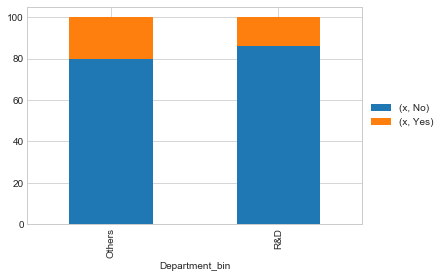

In [118]:
temp = df.pivot_table(values=['x'], index=['Department_bin'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.2 EnvironmentSatisfaction_bin

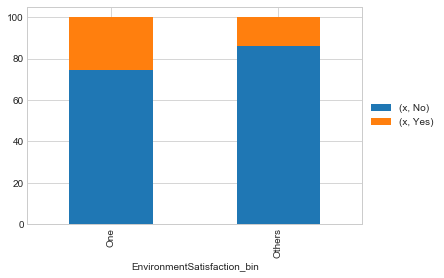

In [119]:
temp = df.pivot_table(values=['x'], index=['EnvironmentSatisfaction_bin'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.3 JobInvolvement

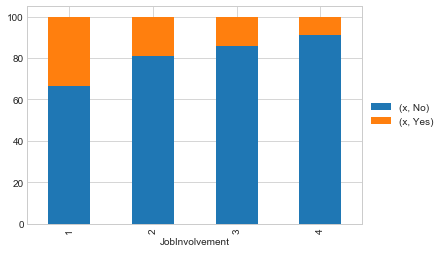

In [120]:
temp = df.pivot_table(values=['x'], index=['JobInvolvement'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.4 JobLevel_bin

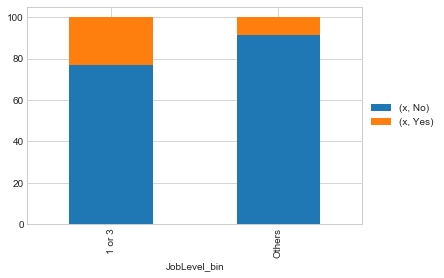

In [121]:
temp = df.pivot_table(values=['x'], index=['JobLevel_bin'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.5 JobSatisfaction_bin

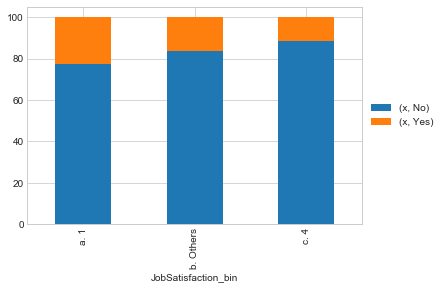

In [122]:
temp = df.pivot_table(values=['x'], index=['JobSatisfaction_bin'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.6 OverTime

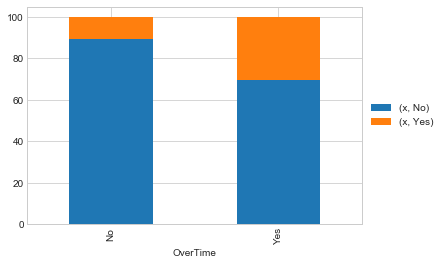

In [123]:
temp = df.pivot_table(values=['x'], index=['OverTime'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.7 RelationshipSatisfaction_bin

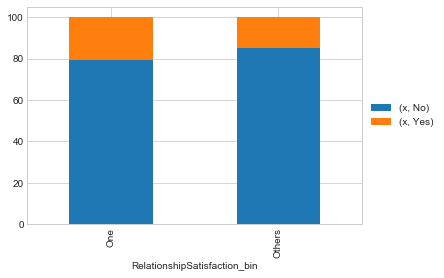

In [124]:
temp = df.pivot_table(values=['x'], index=['RelationshipSatisfaction_bin'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.8 StockOptionLevel_bin

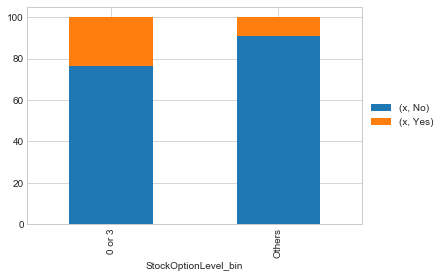

In [125]:
temp = df.pivot_table(values=['x'], index=['StockOptionLevel_bin'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.9 WorkLifeBalance_bin

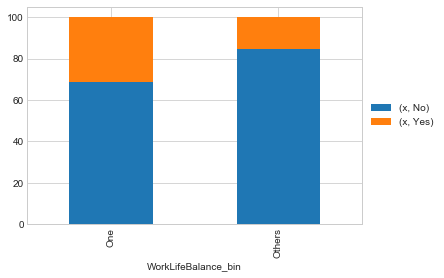

In [126]:
temp = df.pivot_table(values=['x'], index=['WorkLifeBalance_bin'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.10 DistanceFromHome_bin

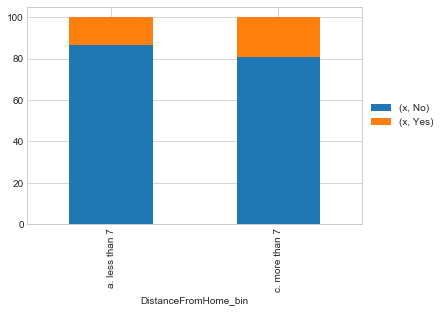

In [127]:
temp = df.pivot_table(values=['x'], index=['DistanceFromHome_bin'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.11 MonthlyIncome_bin

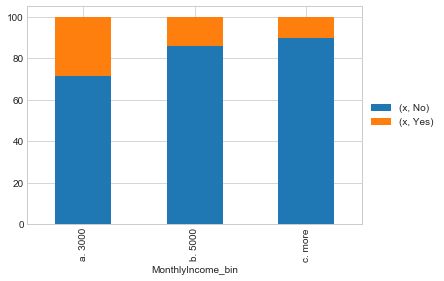

In [128]:
temp = df.pivot_table(values=['x'], index=['MonthlyIncome_bin'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.12 BusinessTravel_bin

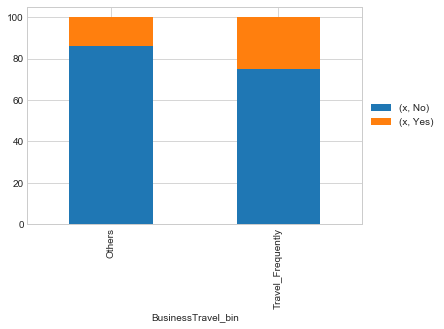

In [129]:
temp = df.pivot_table(values=['x'], index=['BusinessTravel_bin'], columns=['Attrition'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 3 Train Test Split

In [130]:
df['actual'] = df['Attrition'].apply(lambda x: 0 if x == "No" else 1)
df.drop(['x','Attrition'],axis=1,inplace=True)

In [131]:
cat_feats = ['Department_bin','EnvironmentSatisfaction_bin','JobInvolvement','JobLevel_bin','JobSatisfaction_bin',
             'OverTime','RelationshipSatisfaction_bin','StockOptionLevel_bin','WorkLifeBalance_bin','DistanceFromHome_bin',
             'MonthlyIncome_bin','BusinessTravel_bin']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [132]:
x = final_data.drop(['actual'],axis=1)
y = final_data['actual']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# 4 Building the Model

In [133]:
x_train = sm.add_constant(x_train).copy()
logit = sm.Logit(y_train, x_train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.308594
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 actual   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1012
Method:                           MLE   Df Model:                           16
Date:                Sat, 18 Nov 2017   Pseudo R-squ.:                  0.3041
Time:                        19:34:06   Log-Likelihood:                -317.54
converged:                       True   LL-Null:                       -456.31
                                        LLR p-value:                 1.119e-49
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    3.5341      0.701      5.042      0.000       2.160       4.908
Department_bin_R&D                      -0.8353      0.225     -3.706      0.000      -1.277      -0.393
EnvironmentSatisfaction_bin_Others      -1.0828      0.241     -4.484      0.000      -1.556      -0.610
JobInvolvement_2                        -0.9030      0.397     -2.273      0.023      -1.682      -0.124
JobInvolvement_3                        -1.4880      0.380     -3.912      0.000      -2.234      -0.742
JobInvolvement_4                        -2.5896      0.597     -4.338      0.000      -3.760      -1.420
JobLevel_bin_Others                     -1.1028      0.270     -4.089      0.000      -1.631      -0.574
JobSatisfaction_bin_b. Others           -0.5344      0.260     -2.057      0.040      -1.043      -0.025
JobSatisfaction_bin_c. 4                -0.9720      0.298     -3.260      0.001      -1.556      -0.388
OverTime_Yes                             1.9280      0.222      8.683      0.000       1.493       2.363
RelationshipSatisfaction_bin_Others     -0.6023      0.255     -2.365      0.018      -1.102      -0.103
StockOptionLevel_bin_Others             -1.2413      0.216     -5.760      0.000      -1.664      -0.819
WorkLifeBalance_bin_Others              -1.3481      0.383     -3.524      0.000      -2.098      -0.598
DistanceFromHome_bin_c. more than 7      0.6811      0.208      3.276      0.001       0.274       1.089
MonthlyIncome_bin_b. 5000               -0.7269      0.289     -2.515      0.012      -1.293      -0.160
MonthlyIncome_bin_c. more               -1.2396      0.278     -4.461      0.000      -1.784      -0.695
BusinessTravel_bin_Travel_Frequently     1.0450      0.233      4.482      0.000       0.588       1.502
========================================================================================================
"""

In [134]:
x_test = sm.add_constant(x_test).copy()
y_pred = result.predict(x_test)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_pred = y_pred.reset_index(drop=True)
test_calc = pd.concat([x_test,y_test,pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

max c:  0.35
max a:  0.55


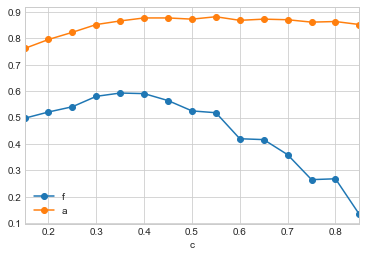

In [135]:
c = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
a = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
p = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
r = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
f = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
i = 0

for j in c:
    def flag(cols):
        x = cols[0]
        j = cols[1]
        if x > j: return 1
        else: return 0
    test_calc['j']=j
    test_calc['flag'] = test_calc[['predicted','j']].apply(flag,axis=1)
    df_table = confusion_matrix(test_calc['actual'],test_calc['flag'])
    a[i] = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p[i] = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r[i] = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p[i] * r[i]) / (p[i] + r[i])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','a','p','r','f']

f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
max_c = float(f_max['c'])
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_a = float(a_max['c'])

df_decision.plot(x='c',y=['f','a'],marker="o")

print ("max c: ",max_c)
print ("max a: ",max_a)

# 5 Predictions and Evaluation

In [136]:
test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.35 else 0)
df_table = confusion_matrix(test_calc['actual'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[339  32]
 [ 27  43]]
accuracy: 0.866213151927
precision: 0.573333333333
recall: 0.614285714286
f1 score:  0.593103448276
